### Wind Energy Data Belmullet 2019: 

The wind energy data was estimated via the webtool [Renewables Ninja](https://www.renewables.ninja/). This webtool shows the estimated amount of energy that could be generated by wind or solar farms at any location. The data available is for 2019. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the data
df = pd.read_csv('windenergy_2019.csv', skiprows=3)
df

,time,local_time,electricity,wind_speed
0,2019-01-01 00:00,2019-01-01 00:00,0.507,8.046
1,2019-01-01 01:00,2019-01-01 01:00,0.461,7.728
2,2019-01-01 02:00,2019-01-01 02:00,0.424,7.466
3,2019-01-01 03:00,2019-01-01 03:00,0.381,7.160
4,2019-01-01 04:00,2019-01-01 04:00,0.315,6.664
...,...,...,...,...
8755,2019-12-31 19:00,2019-12-31 19:00,0.492,7.945
8756,2019-12-31 20:00,2019-12-31 20:00,0.503,8.011
8757,2019-12-31 21:00,2019-12-31 21:00,0.515,8.097
8758,2019-12-31 22:00,2019-12-31 22:00,0.518,8.121


In [45]:
df.isnull().sum()

local_time     0
electricity    0
wind_speed     0
dtype: int64

In [3]:
# change time to datetime
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,local_time,electricity,wind_speed
time,,,
2019-01-01 00:00:00,2019-01-01 00:00,0.507,8.046
2019-01-01 01:00:00,2019-01-01 01:00,0.461,7.728
2019-01-01 02:00:00,2019-01-01 02:00,0.424,7.466
2019-01-01 03:00:00,2019-01-01 03:00,0.381,7.160
2019-01-01 04:00:00,2019-01-01 04:00,0.315,6.664
...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00,0.492,7.945
2019-12-31 20:00:00,2019-12-31 20:00,0.503,8.011
2019-12-31 21:00:00,2019-12-31 21:00,0.515,8.097


In [4]:
# check data types
df.dtypes


local_time      object
electricity    float64
wind_speed     float64
dtype: object

In [5]:
# Total electricity for each month

# groupby month 
df_month = df.resample('ME').sum() # sum of each month 


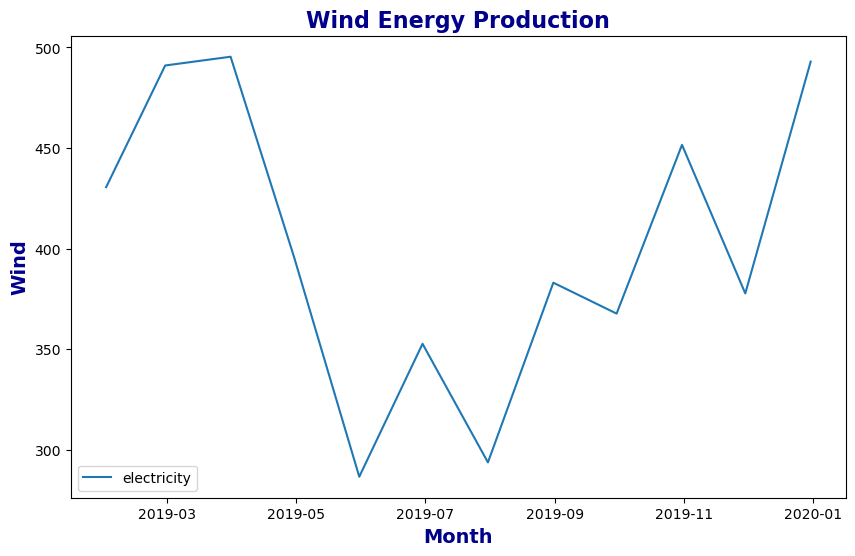

In [6]:
# plot the data
plt.figure(figsize=(10,6))
plt.plot(df_month['electricity'], label='electricity')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Wind', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Wind Energy Production', fontsize=16, fontweight='bold', color='darkblue')
plt.legend()
plt.savefig('windenergy.png')
plt.show()

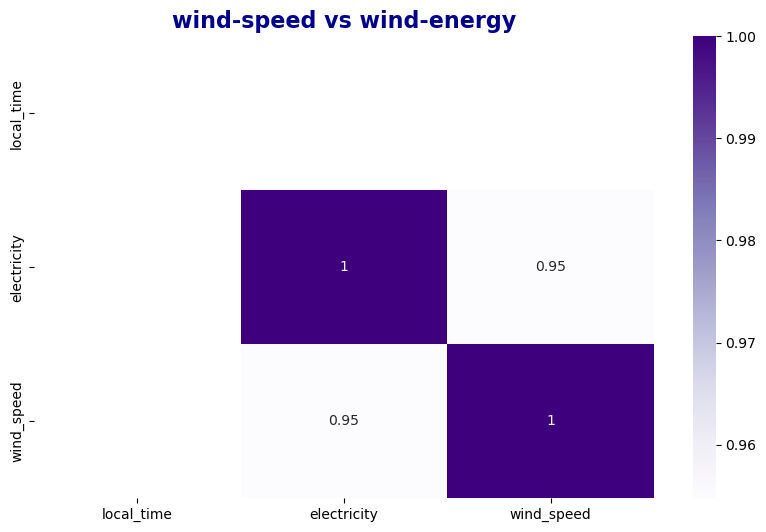

In [44]:
# heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Purples')
plt.title('wind-speed vs wind-energy', fontsize=16, fontweight='bold', color='darkblue')
#plt.savefig('correlation.png')
plt.show()

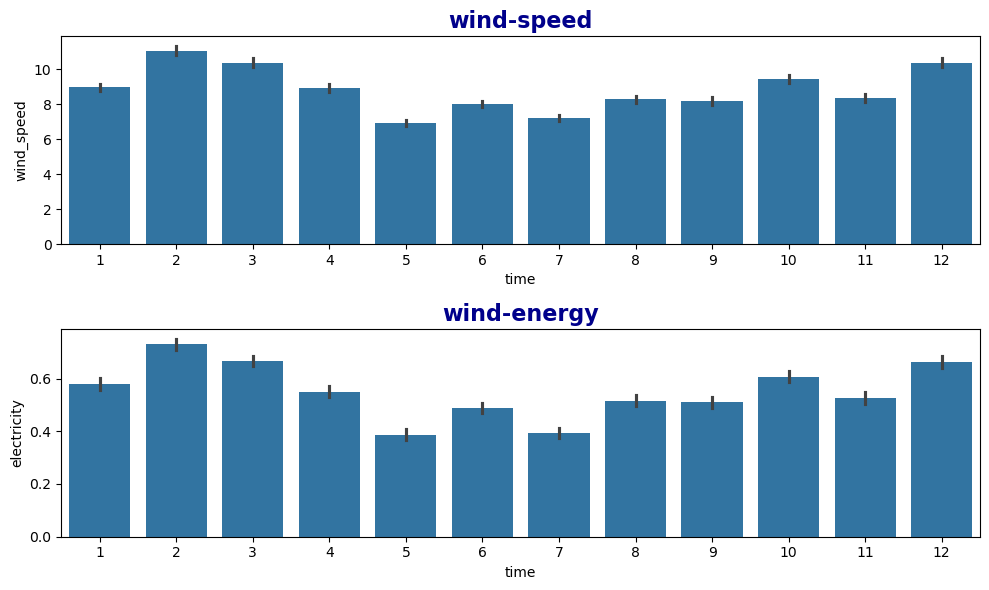

In [29]:
# subplots of windspeed vs windenergy
fig, ax = plt.subplots(2, 1, figsize=(10,6))
sns.barplot(x=df.index.month, y=df['wind_speed'], ax=ax[0])
ax[0].set_title('wind-speed', fontsize=16, fontweight='bold', color='darkblue')
sns.barplot(x=df.index.month, y=df['electricity'], ax=ax[1])
ax[1].set_title('wind-energy', fontsize=16, fontweight='bold', color='darkblue')
plt.tight_layout()
#plt.savefig('subplot.png')
plt.show()

In [24]:
# can the wind speed predict the electricity production?
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['wind_speed']]
y = df['electricity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

# r2 score
model.score(X_test, y_test)

# r2 score is 0.85 which is good. The wind speed can predict the electricity production.
# The model is good.




0.9175955988362758

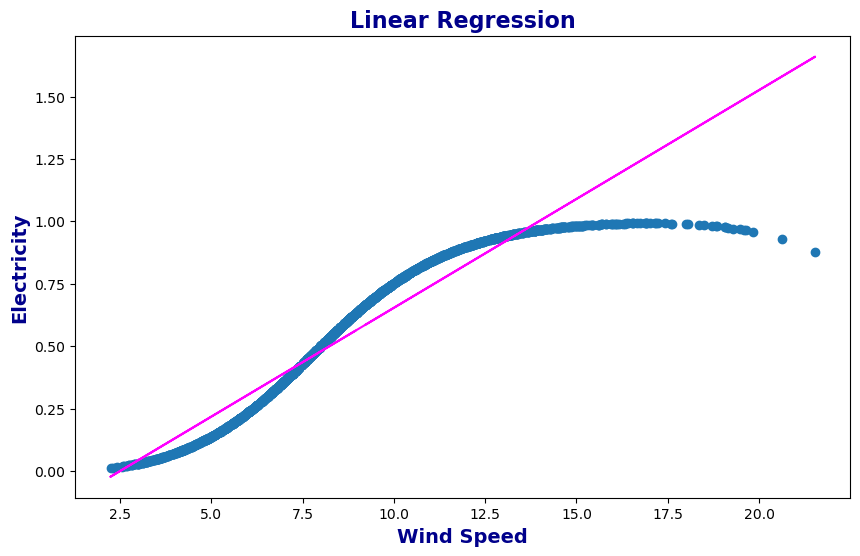

In [33]:
# plot the linear regression with trendline
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='magenta')
plt.xlabel('Wind Speed', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Electricity', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Linear Regression', fontsize=16, fontweight='bold', color='darkblue')
plt.savefig('linear_regression.png')
plt.show()



[0.56119866 0.48855906 0.14088308 ... 0.85158266 0.41923315 0.58605134]
time
2019-09-10 08:00:00    0.628
2019-08-20 12:00:00    0.515
2019-09-07 14:00:00    0.077
2019-11-16 18:00:00    0.061
2019-05-19 07:00:00    0.558
                       ...  
2019-12-13 03:00:00    0.989
2019-01-05 04:00:00    0.736
2019-10-03 05:00:00    0.912
2019-03-16 07:00:00    0.402
2019-09-08 13:00:00    0.665
Name: electricity, Length: 1752, dtype: float64


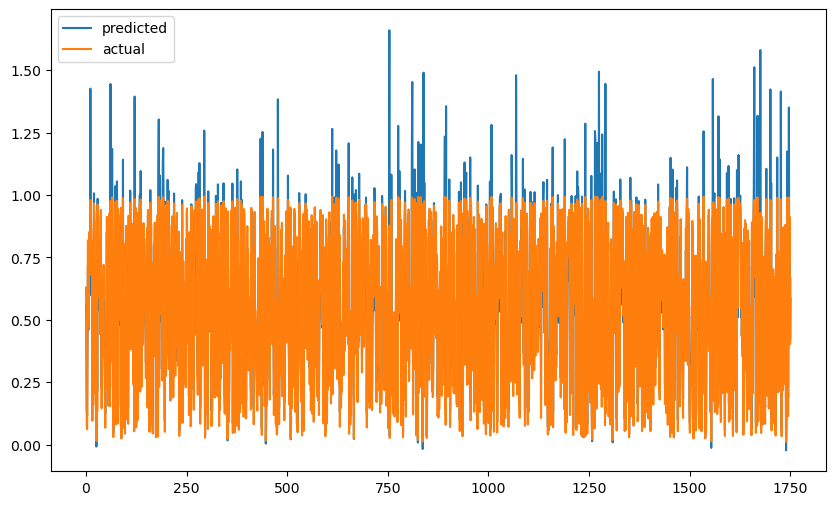

In [40]:
# plot the predicted values and actual values
plt.figure(figsize=(10,6))
plt.plot(y_pred, label='predicted')
plt.plot(y_test.values, label='actual')
plt.legend()
plt.savefig('predicted_values.png')
plt.show()

In [42]:
# mean squared error 
mse = mean_squared_error(y_test, y_pred)
print(f'The MSE is {mse}')
print(f'The RMSE is {rmse}')
print(f'The R2 score is {model.score(X_test, y_test)}')


The MSE is 0.007768581136724308
The RMSE is 0.08813955489293276
The R2 score is 0.9175955988362758


***
### End